In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/joelk/Downloads/archive/amz_uk_price_prediction_dataset.csv")

In [3]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [4]:
# Creating the crosstab between category and isBestSeller
crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

# Sorting categories based on the proportion of best-sellers (True)
crosstab_sorted = crosstab.sort_values(by=True, ascending=False)

# Display the sorted crosstab
print(crosstab_sorted)


isBestSeller                         False     True 
category                                            
Grocery                           0.941865  0.058135
Smart Home Security & Lighting    0.942308  0.057692
Health & Personal Care            0.942314  0.057686
Mobile Phone Accessories          0.957529  0.042471
Power & Hand Tools                0.964661  0.035339
...                                    ...       ...
CD, Disc & Tape Players           1.000000  0.000000
General Music-Making Accessories  1.000000  0.000000
Snowboard Boots                   1.000000  0.000000
Boxes & Organisers                1.000000  0.000000
eBook Readers & Accessories       1.000000  0.000000

[296 rows x 2 columns]


In [5]:
cross_tab = pd.crosstab(df['category'], df['isBestSeller'])
cross_tab

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [6]:
from scipy.stats import chi2_contingency

# Create the contingency table (without normalization)
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpret the results: If p < 0.05, we reject the null hypothesis (there's a relationship)
if p < 0.05:
    print("There is a significant association between category and best-seller status.")
else:
    print("There is no significant association between category and best-seller status.")




Chi-square statistic: 36540.20270061387
P-value: 0.0
There is a significant association between category and best-seller status.


#### Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

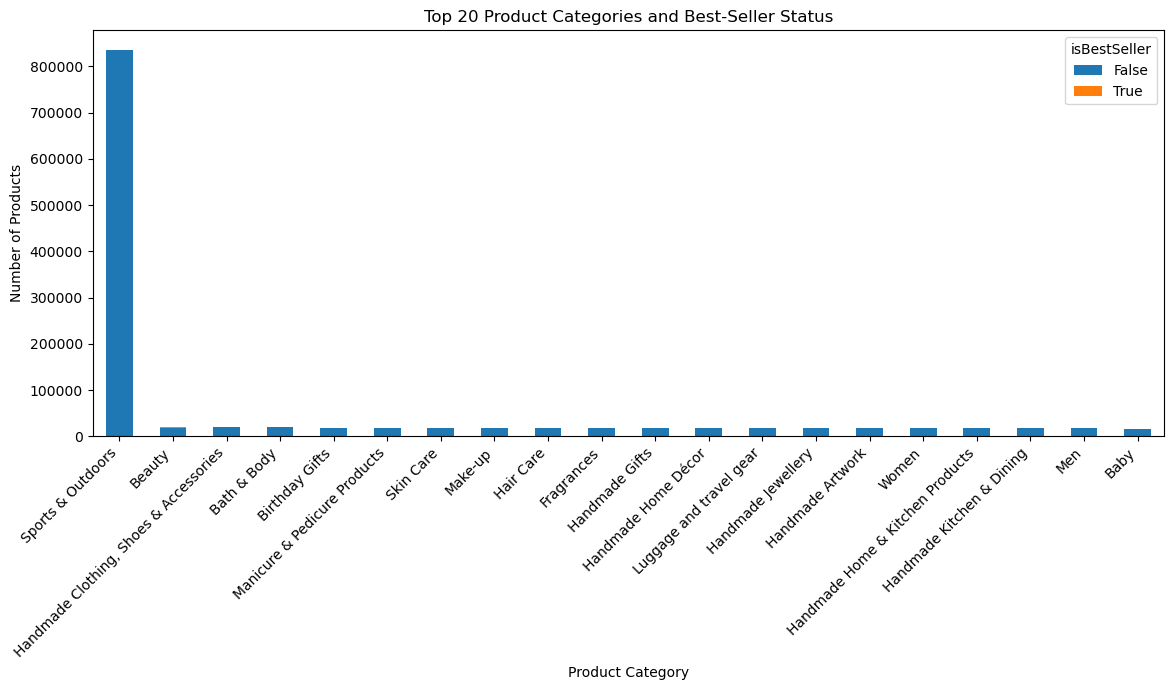

In [8]:

# Group by category and isBestSeller, count the occurrences
category_bestseller = df.groupby(['category', 'isBestSeller']).size().unstack()

# Sort by total number of products in each category
category_bestseller['total'] = category_bestseller.sum(axis=1)
category_bestseller = category_bestseller.sort_values('total', ascending=False)

# Select the top 20 categories
top_categories = category_bestseller.head(20).drop(columns='total')

# Plotting a stacked bar chart
top_categories.plot(kind='bar', stacked=True, figsize=(12, 7))

# Adding labels and title
plt.xlabel('Product Category')
plt.ylabel('Number of Products')
plt.title('Top 20 Product Categories and Best-Seller Status')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.tight_layout()
plt.show()


In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

#### Violin Plot of Price Across Categories

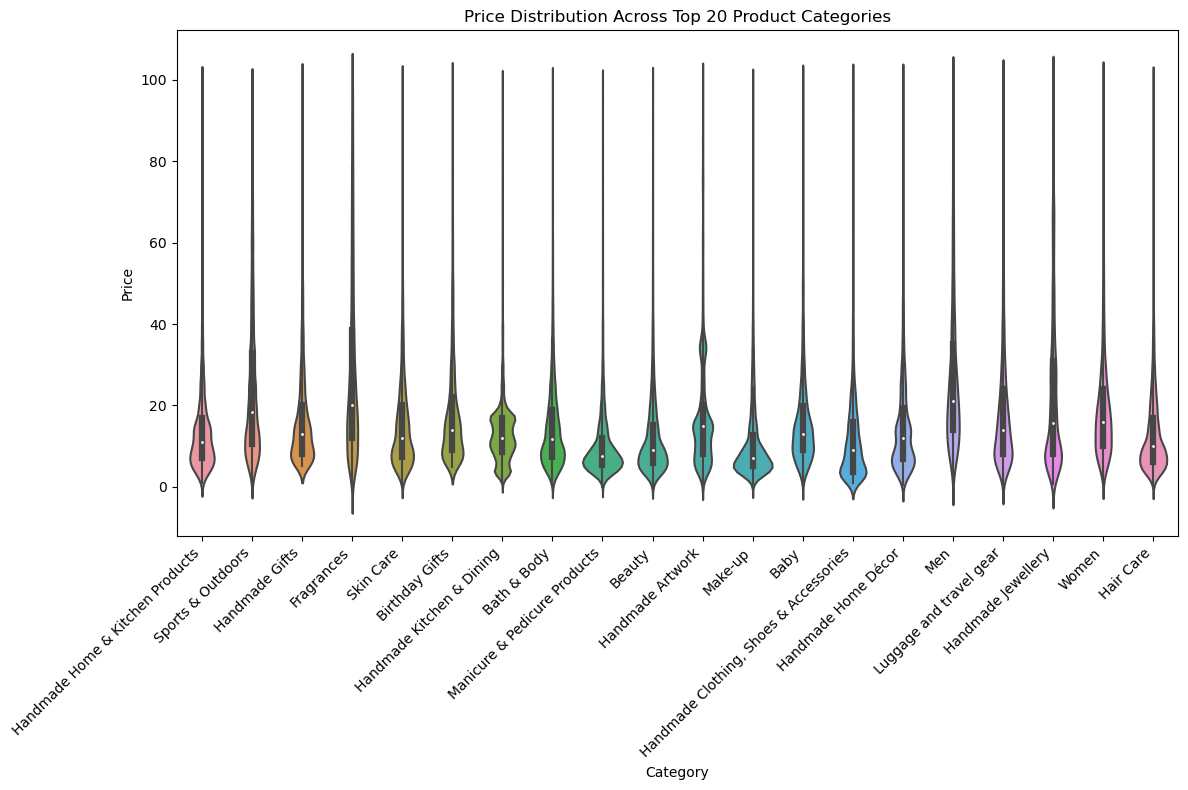

In [10]:
# Filter the top 20 categories based on the number of products
top_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_categories = df_no_outliers[df_no_outliers['category'].isin(top_categories)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_categories)
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


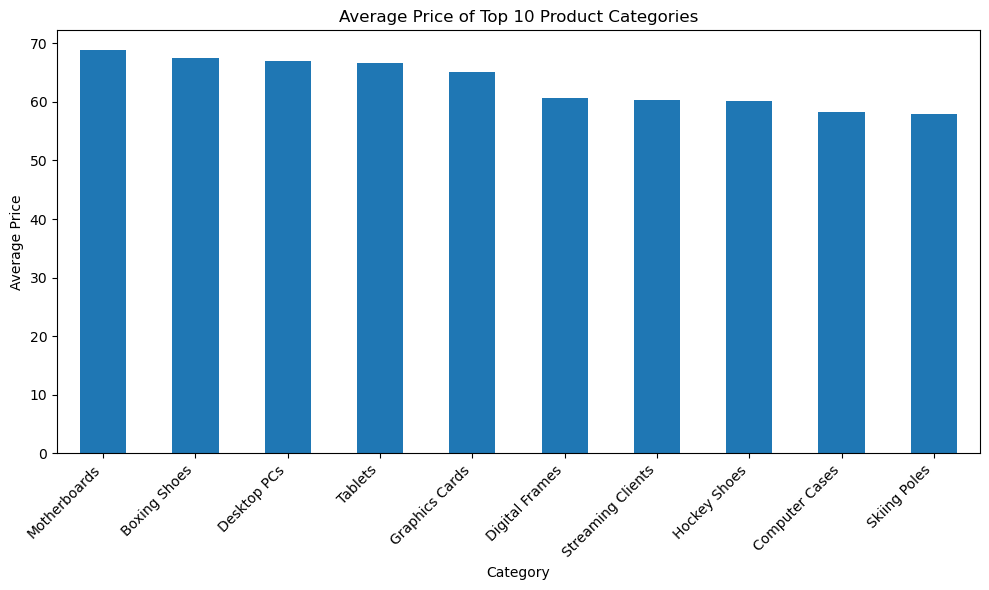

In [11]:
# Calculate average price for the top 10 categories
average_price_by_category = df_no_outliers.groupby('category')['price'].mean().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
average_price_by_category.plot(kind='bar')
plt.title('Average Price of Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


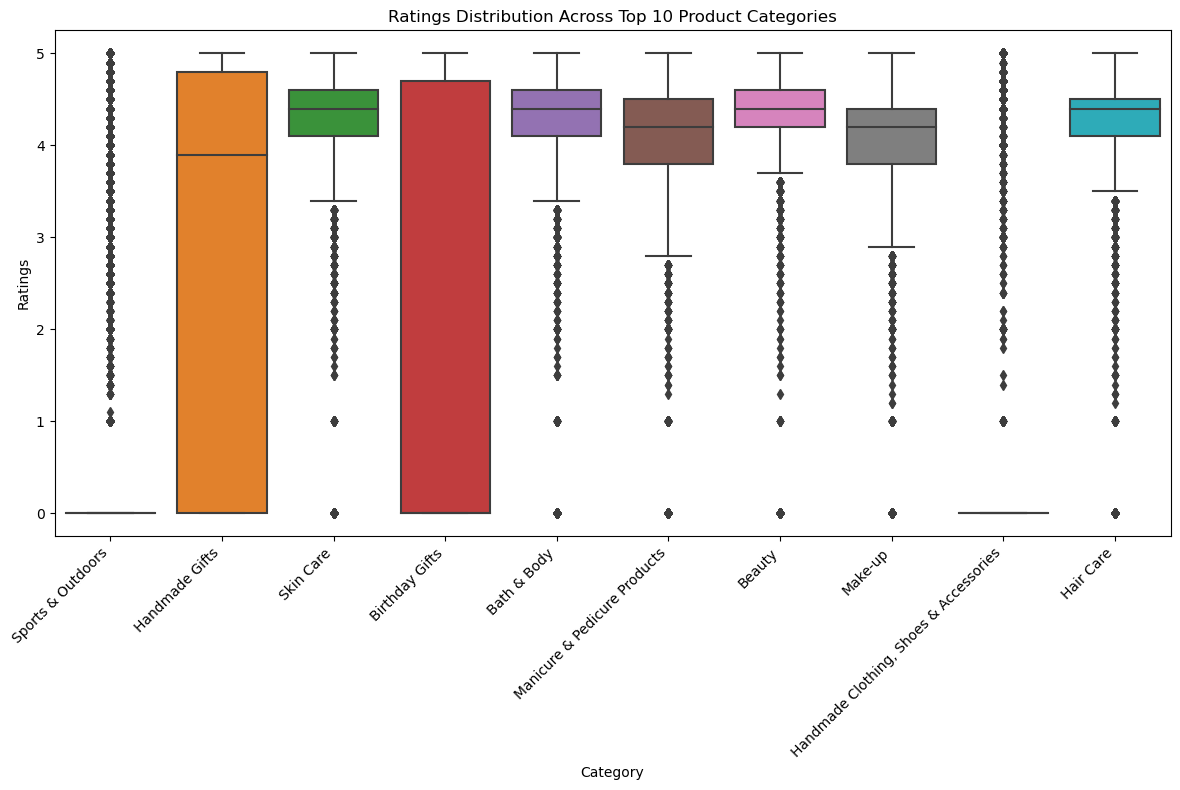

In [12]:
# Filter the top 10 categories based on the number of products
top_categories_ratings = df_no_outliers['category'].value_counts().head(10).index
df_top_categories_ratings = df_no_outliers[df_no_outliers['category'].isin(top_categories_ratings)]

# Create box plots for ratings
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_categories_ratings)
plt.xticks(rotation=45, ha='right')
plt.title('Ratings Distribution Across Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()


In [13]:
# Calculate the correlation coefficient
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f'Correlation between price and ratings: {correlation}')


Correlation between price and ratings: -0.07767299878181323


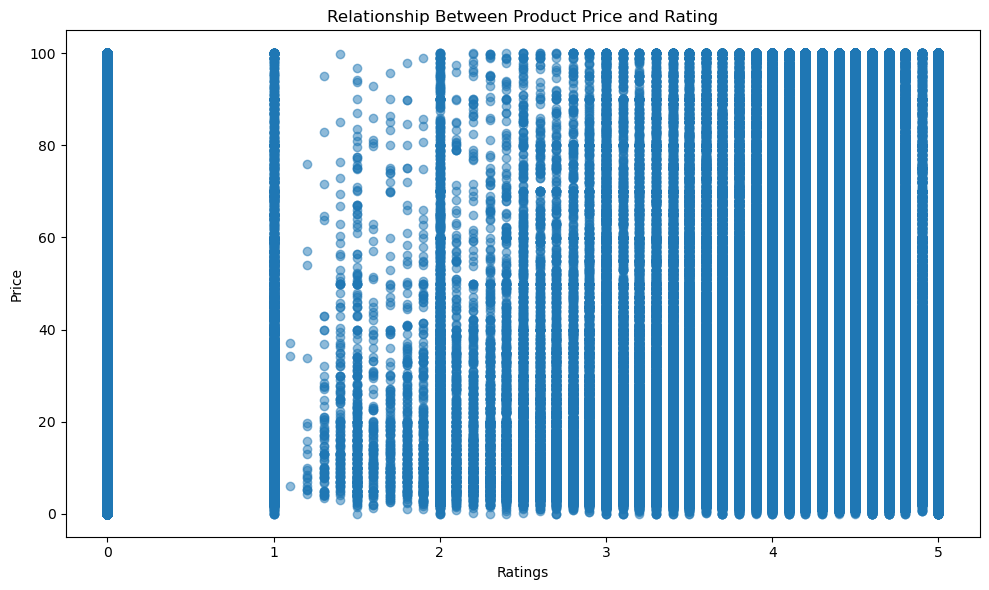

In [14]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5)
plt.title('Relationship Between Product Price and Rating')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.tight_layout()
plt.show()


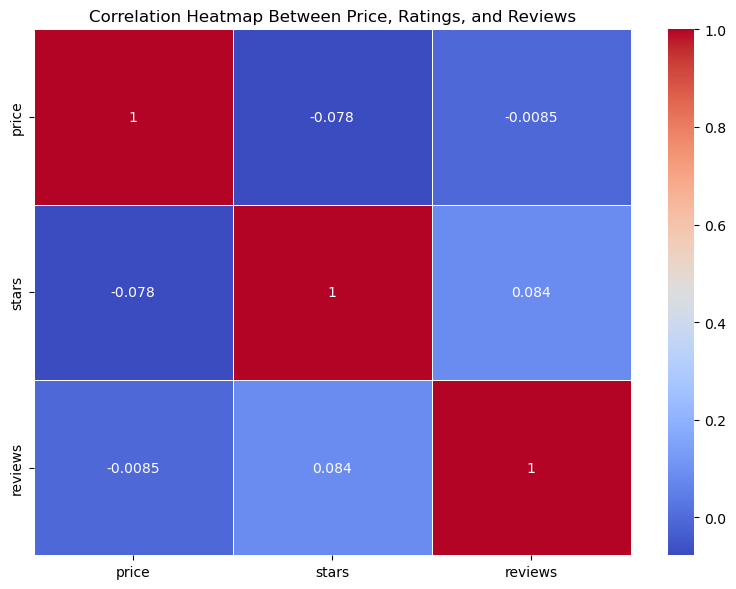

In [15]:
# Create a correlation matrix
corr_matrix = df_no_outliers[['price', 'stars', 'reviews']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Between Price, Ratings, and Reviews')
plt.tight_layout()
plt.show()


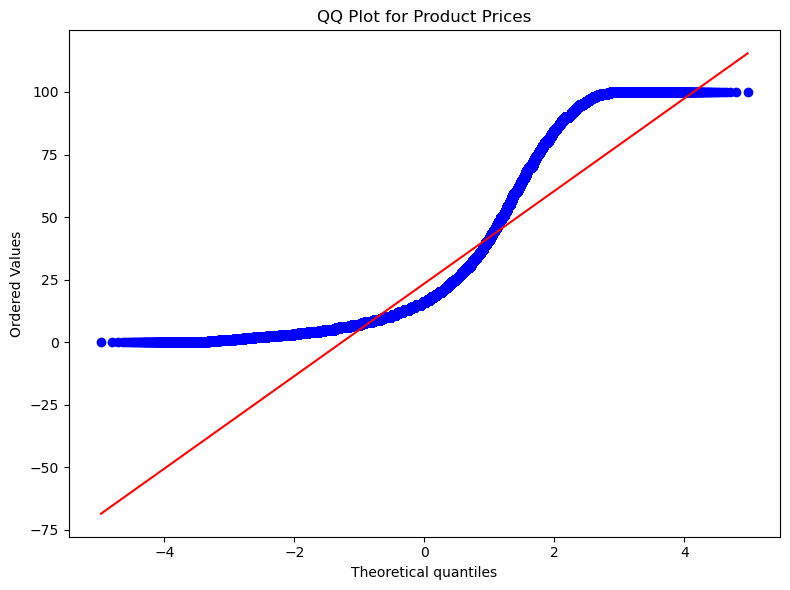

In [17]:
import scipy.stats as stats

# Generate the QQ plot
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.tight_layout()
plt.show()
